<center><h1><b>Lecture 5</b></h1></center>
<center><h1><b>Randomized Trials and Hypothesis Checking</b></h1></center>

<center><h4>Time: T2 (09:00 ~ 09:50) and R78 (15:30 ~ 17:20)</h4></center>

<center><h2>Chieh-En Lee<sup>1</sup> (李杰恩) and Chung-Hao Tien<sup>2</sup> (田仲豪)</h2></center>

<center>
<h4>{<a href="mailto:celee@nycu.edu.tw">celee</a><sup>1</sup>, 
<a href="mailto:chtien@nycu.edu.tw">chtien</a><sup>2</sup>}@nycu.edu.tw</h4>
</center>

<center><h3><a href="https://dop.nycu.edu.tw/ch/index.html">Department of Photonics</a>, <a href="https://www.nycu.edu.tw/">NYCU</a></h3></center>

<br />
<center><h5><a href="https://github.com/bruce88617/nycudopcs_advanced">Data Science and Python Programming</a>, 2024 Spring</h5></center>


## Last Time

- Law of large numbers
- Monte Carlo method
- Sampling
- The central limit theorem (CLT) and confidence interval

## **Today**

<ul>
  <li><a href="#tag1">Checking significance: z-test</a></li>
  <li><a href="#tag2">Rejection regions, p-value, errors, and tails</a></li>
  <li><a href="#tag3">The distribution of sample variances</a></li>
  <li><a href="#tag4">T-test</a></li>
  <li><a href="#tag5">One-sample and two-sample tests</a></li>
</ul>


## **Introduction**

> Once upon a time...
>
> 這個世界的某處，在一個亞熱帶的島嶼上有著一個國家，上面住著大概兩千萬左右的南方島國子民，一直以來過著呼呼嘿嘿安安穩穩的日子，直到近80年前的某一天，基於人道考量，他們接納了從島嶼西方那塊大陸湧入的上百萬難民，伴隨著他們而來的是一個名為吃人夠夠的病毒，這個病毒會抑制身體的生長激素，導致這個南方島國子民下一代的平均身高下降了15cm，來到了170cm，讓他們在跟其他民族交流的時候都得抬頭90度仰望對方，一直以來都讓這個國家的執政者非常地困擾。
>
> 某一天，這個國家的領導人與政府機構突然收到了一項資訊，某位科學家宣稱，只要讓小朋友在青春期的時候，注射三劑他所開發的特殊疫苗，就可以有效抑制吃人夠夠病毒、促進身體成長、使身材變得更加高大，並附上對應的第三期臨床實驗結果。請問，如果你是這個國家的領導階層，你該怎麼判斷這個科學家提供之實驗結果是具有統計意義的呢？

#### Randomized Trial of **吃人夠夠 Vaccine**

- The scientist persuaded 200 teenagers who lived in this southern island country to participate in his randomized trial of 吃人夠夠 vaccine. The scientist then divided them randomly into two groups: treatment and control. 

- Each member of **treatment group** received 3 doses of 吃人夠夠 vaccination. Members of the **control group** were told that they were being given 3 doses of 吃人夠夠 vaccination, but were instead given 3 doses of normal saline.

- By the time that these 200 teenagers were 20 years old, the scientist measured their body height and got this result.

<center><img align="center" height=300px width=auto src="./assets/fig01.png"></center>

- The scientist is elated about the result of his clinical trial, which shows that the mean body height of the treatment group is $172.83$ cm, and that of the control group is $170.24$ cm.

- However, a statistician points out that it was almost inevitable that one of the two groups would have a higher mean than the other, and **perhaps the difference in means is merely a random occurrence**.

- So, **how does the scientist check the statistical significance of her/his trial**?


#### Review: Central Limit Theorem

- Given a set of sufficiently large samples drawn from the same population, **the sample means will be approximately normally distributed**.

<center><img align="center" height=300px width=auto src="./assets/fig02.png"></center>

- This normal distribution will **have a mean close to the means of the population**.

- The variance of the sample means will be **close to the variance of the population divided by the sample size**.

$$
\begin{aligned}

\mathbb{E} [\bar{X}] &= \mathbb{E} [X] \\
\text{Var} [\bar{X}] &= \frac{\text{Var} [X]}{n}

\end{aligned}
$$

#### Check The Probability

- We can check that,

    1. What is the probability of **the sample mean (mean of treatment group) within the range of 95% confidence interval**?

    2. What is the probability of **the sample mean (mean of treatment group) equal to the population mean (mean of control group)**?

<center><img align="center" height=300px width=auto src="./assets/fig03.png"></center>

- It is difficult to analyze this if we directly check the position of treatment group in the probability density function of control group.

- How do we do this with reasonable approach?





Control Group, (Mean, STD) = (170.34, 6.10)
Treatment Group, (Mean, STD) = (172.13, 4.16)


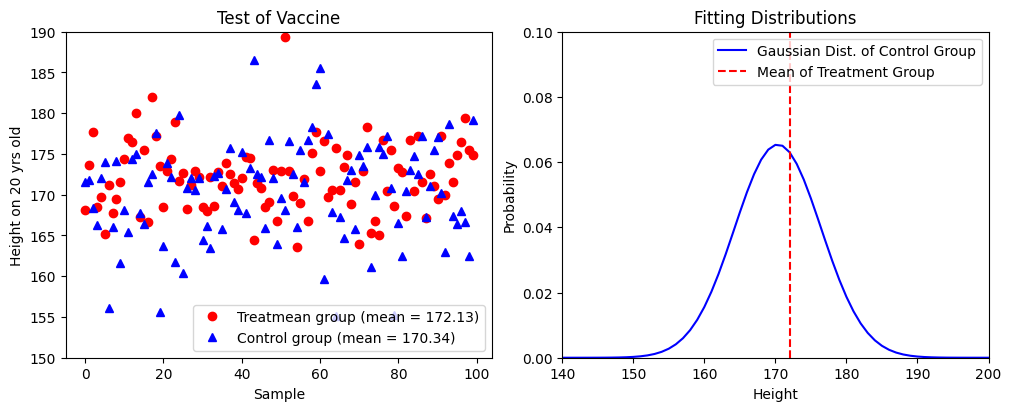

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.basicFuncs import gaussDist, calProb

data = np.load("./data/example1.npz")
treatmentHeights, controlHeights = data["treatmentHeights"], data["controlHeights"]
mTreat, sTreat = np.mean(treatmentHeights), np.std(treatmentHeights)
mControl, sControl = np.mean(controlHeights), np.std(controlHeights)

print("Control Group, (Mean, STD) = ({:.02f}, {:.02f})".format(mControl, sControl))
print("Treatment Group, (Mean, STD) = ({:.02f}, {:.02f})".format(mTreat, sTreat))

fig = plt.figure(figsize=(10,4), dpi=100, layout="constrained", facecolor="w")
    
ax1 = fig.add_subplot(121)

ax1.plot(treatmentHeights, 'ro', label="Treatmean group (mean = {:.02f})".format(mTreat))
ax1.plot(controlHeights, 'b^', label="Control group (mean = {:.02f})".format(mControl))
ax1.set_title("Test of Vaccine")
ax1.set_xlabel("Sample")
ax1.set_ylabel("Height on 20 yrs old")
ax1.set_ylim([150, 190])
ax1.legend(loc="best")

x = np.linspace(100, 200, 101)

ax2 = fig.add_subplot(122)
ax2.plot(x, gaussDist(x, mu=mControl, sigma=sControl), 'b', label="Gaussian Dist. of Control Group")
ax2.vlines(mTreat, ymin=0, ymax=0.1, colors='r', linestyles='dashed', label="Mean of Treatment Group")
ax2.set_title("Fitting Distributions")
ax2.set_xlabel("Height")
ax2.set_ylabel("Probability")
ax2.set_xlim([140, 200])
ax2.set_ylim([0, 0.1])
ax2.legend(loc="best")
    
plt.show()

#### Distribution Normalization

- In this case, what we want to check is the sample mean defined by:

$$
Y = \frac{X_1 + X_2 + \dots + X_N}{N} \\
\mathbb{E}[Y] = \mathbb{E}[X] \\
\text{Var}[Y] = \frac{\text{Var}[X]}{N}
$$

- It is more appropriate to do this **based on the normalized distribution of the sample mean**, 

$$
Z = \frac{Y - \mathbb{E}[X]}{\text{Std}[Y]} = \frac{Y - \mu_0}{\frac{\text{Std}[X]}{\sqrt{N}}}
$$

#### Result of Checking

- By calculating **the $z$-value (standard score)**,

$$
Z = \frac{Y - \mu_0}{\frac{\text{Std}[X]}{\sqrt{N}}} = \frac{172.13 - 170}{\frac{5.5}{\sqrt{100}}} = 3.865
$$

- By substituting the $z$-value into a normal distribution with $\mu = 0$ and $\sigma = 1$, we can get the probability of getting a sample mean that is equal to $172.13$ cm is about $0.00011$.

<center><img align="center" height=300px width=auto src="./assets/fig04.png"></center>

- Therefore, we can conclude that **it is nearly impossible to get $100$ samples with $172.13$ sample mean from the original population**. We can also **claim that the 吃人夠夠 vaccine does have statistical significance**. 



z-value = 3.865
Probability = 0.00011


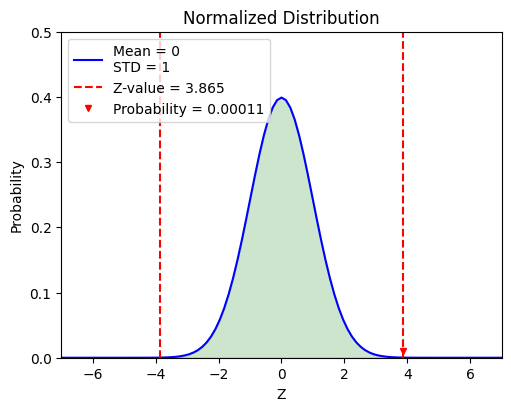

In [3]:
from scripts.testFuncs import test1

test1(target=170, pVar=5.5)

#### Brief Summary

- What have we learned in this example?

    1. Start a randomized trial for 吃人夠夠 vaccine.
    
    2. We **assume that the mean height of treatment group should be 170 cm**.
    
    3. Calculate the **$z$-value and check the probability** of getting a mean height that is equal to $172.13$ cm.
    
    4. **Reject the assumption** if that probability is low.
    

<br>

<center><h4><font color="#FFFF00">The entire process is known as the "hypothesis checking."</font></h4></center>


<a id="tag1"></a>

## **Checking Significance**

#### Hypothesis Checking: $z$-test

- State a **null hypothesis**, $𝐻_0$ and an **alternative hypothesis**, $𝐻_𝑎$. The alternative hypothesis is a hypothesis that can be true only if the null hypothesis is false.

- For our randomized trial of 吃人夠夠 vaccine, **the null hypothesis would be the mean body height of treatment group is $170$ cm**, and **the alternative hypothesis is the mean body height of treatment group is not $170$ cm**.

$$
H_0 : \mu = 170 \\
H_a : \mu \neq 170
$$

- **Set a threshold $\alpha$ for statistical significance**, and decide whether that probability is sufficiently small that **you are willing to assume that the null hypothesis is false**.

- If the probability of sampling data from distributions consistent with the null hypothesis **is less than $\alpha$**. We then say that **we can reject the null hypothesis with confidence $\alpha$**, and accept the negation of the null hypothesis with probability $1 − \alpha$.

- Choose a statistic **as the test statistic**. For our randomized trial of 吃人夠夠 vaccine, what we want to check is **the mean body height of treatment group**. And the probability density function of mean body height would be a normal distribution based on the central limit theorem.

$$
Y = \frac{X_1 + X_2 + \dots + X_N}{N} \\
\\
Z = \frac{Y - \mathbb{E}[X]}{\text{Std}[Y]} = \frac{Y - \mu_0}{\frac{\sigma}{\sqrt{N}}}
$$

- Reject the null hypothesis if the probability of the standard score of test statistic is sufficiently low ($0.00011 < 0.05, \text{for } \alpha = 0.05$).


<a id="tag2"></a>

## **Rejection Regions, P-value, Errors, and Tails**

#### Rejection Regions and $p$-value

- The threshold $\alpha$ for statistical significance will affect the size of rejection regions of two-tailed checking.

$$
H_0 : \mu = 170 \\
H_a : \mu \neq 170
$$

<center><img align="center" height=300px width=auto src="./assets/fig05.png"></center>

- If the probability of the standard score of test statistic ($p$-value) is less than the threshold $\alpha$, we then say that we can reject the null hypothesis with confidence $\alpha$, and accept the negation of the null hypothesis with probability $1 - \alpha$.




#### Type of Errors

- The choice of threshold 𝛼 affects the kind of errors we make. As 𝛼 increasing, the more often we will reject a null hypothesis, and vice versa.

<center><img align="center" height=250px width=auto src="./assets/fig06.png"></center>

<br>

<center>

|Error|Description|Example|
|:---:|:----------|:------|
|**Type I**|The null hypothesis is true but being rejected.|The vaccine has no effect, but you believe it works.|
|**Type II**|The null hypothesis is false but being accepted.|The vaccine works, but you believe it does not.|

</center>

<br>

<center><h4>In general, the real-world consequences of a <font color="#FFFF00">Type II Error</font> are much greater.</h4></center>


#### Tails

- The definition of null hypothesis might affect the property of the test statistic. Thus far in this lecture, **the null hypothesis is the mean body height of treatment group is $170$ cm** so that **the alternative hypothesis is the mean height of treatment group is not $170$ cm**. As a result, **the test is two-tailed**.

$$
H_0 : \mu = 170 \\
H_a : \mu \neq 170
$$

- However, **the test is one-tailed** if the null hypothesis becomes

$$
H_0 : \mu \gt 170 \\
H_a : \mu \leq 170
$$

<center><img align="center" height=300px width=auto src="./assets/fig07.png"></center>

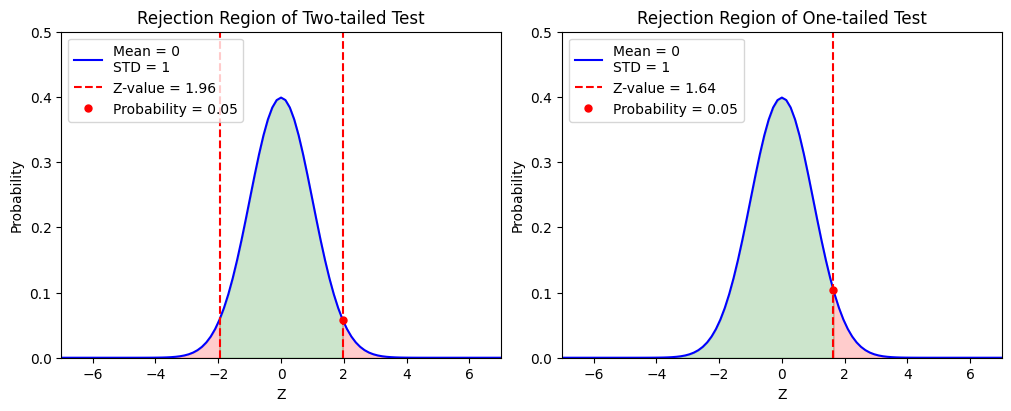

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scripts.basicFuncs import gaussDist, calProb

zValue = 1.96
pValue = calProb(zValue)

fig = plt.figure(figsize=(10,4), dpi=100, layout="constrained", facecolor="w")
    
x = np.linspace(-7, 7, 101)
x1 = np.linspace(-7, -zValue, 51)
x2 = np.linspace(-zValue, zValue, 51)
x3 = np.linspace(zValue, 7, 51)

ax = fig.add_subplot(121)
ax.plot(x, gaussDist(x), 'b', label="Mean = {}\nSTD = {}".format(0, 1))
ax.vlines([-zValue, zValue], ymin=0, ymax=0.5, colors='r', linestyles='dashed', label="Z-value = {:.02f}".format(zValue))
ax.plot(zValue, gaussDist(zValue), 'ro', markersize=5, label="Probability = {:.02f}".format(pValue))
ax.fill_between(x1, y1=gaussDist(x1), y2=0, color='r', alpha=0.2)
ax.fill_between(x2, y1=gaussDist(x2), y2=0, color='g', alpha=0.2)
ax.fill_between(x3, y1=gaussDist(x3), y2=0, color='r', alpha=0.2)
ax.set_title("Rejection Region of Two-tailed Test")
ax.set_xlabel("Z")
ax.set_ylabel("Probability")
ax.set_xlim([-7, 7])
ax.set_ylim([0, 0.5])
ax.legend(loc=2)    # upper left

zValue = 1.64
pValue = calProb(zValue, symmetric=False)

x2 = np.linspace(-7, zValue, 51)
x3 = np.linspace(zValue, 7, 51)

ax2 = fig.add_subplot(122)
ax2.plot(x, gaussDist(x), 'b', label="Mean = {}\nSTD = {}".format(0, 1))
ax2.vlines([zValue], ymin=0, ymax=0.5, colors='r', linestyles='dashed', label="Z-value = {:.02f}".format(zValue))
ax2.plot(zValue, gaussDist(zValue), 'ro', markersize=5, label="Probability = {:.02f}".format(pValue))
ax2.fill_between(x2, y1=gaussDist(x2), y2=0, color='g', alpha=0.2)
ax2.fill_between(x3, y1=gaussDist(x3), y2=0, color='r', alpha=0.2)
ax2.set_title("Rejection Region of One-tailed Test")
ax2.set_xlabel("Z")
ax2.set_ylabel("Probability")
ax2.set_xlim([-7, 7])
ax2.set_ylim([0, 0.5])
ax2.legend(loc=2)    # upper left

plt.show()

#### Brief Summary of $z$-test

- The flowchart of hypothesis checking ($z$-test):

    1. Have data.
    
    2. State the null hypothesis $𝐻_0$ and alternative hypothesis $𝐻_𝑎$. Set a confidence threshold $\alpha$.
    
    3. Calculate the standard score ($z$-value) of the test statistic.
    
    4. Claim that we can reject the null hypothesis with confidence $\alpha$ if the standard score is in the rejection region and accept the alternative hypothesis with confidence $1 − \alpha$.
    

<br>

<center><h4><font color="#FFFF00">Do we always know the parameters of population?</font></h4></center>

<a id="tag3"></a>

## **The Distribution of Sample Variances**

#### When the number of samples is small,

- Usually, we do not know the mean $\mu_0$ and standard deviation $\sigma$ of the population.

$$
Z = \frac{Y - \mathbb{E}[X]}{\text{Std}[Y]} = \frac{Y - \mu_0}{\frac{\sigma}{\sqrt{N}}} 
    = \frac{\mu_{treatment} - \color{#FFFF00}{170}}{\frac{\color{#FFFF00}{5.5}}{\sqrt{N}}}
    = \frac{\mu_{treatment} - \color{#FFFF00}{\text{testing value}}}{\frac{\color{#FFFF00}{5.5}}{\sqrt{N}}}
$$

- In that case, we assume that the mean and standard deviation of control group are close or equal to those of population if the number of samples is large enough. **Another situation arises, what if the number of samples is not large enough?**

<center><img align="center" height=300px width=auto src="./assets/fig08.png"></center>


z-value = 0.159
Probability = 0.8734825497311709


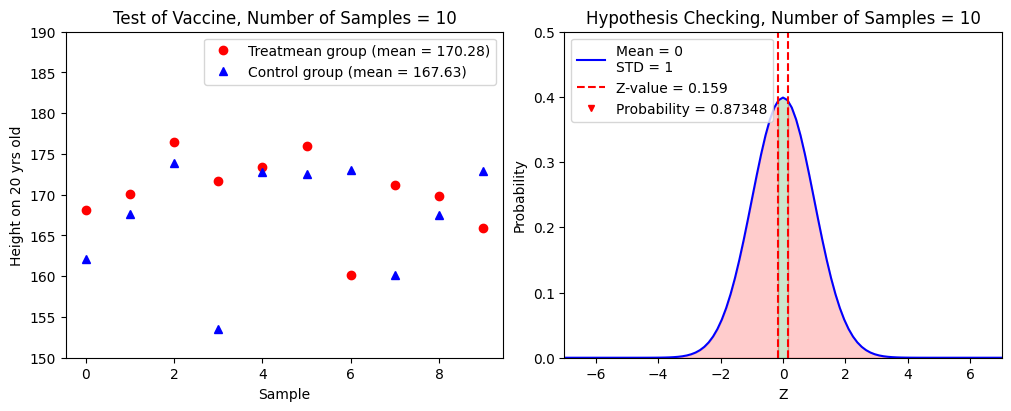

In [5]:
from scripts.testFuncs import test2

test2(numSamples=10)

#### Sample variance of small number of samples

- Let assume we have a normally distributed population $P$, whose mean and standard deviation are $0$ and $1$.

$$
P \backsim \cal{N}(0, 1)
$$

- What we are interesting is that **the distribution of sample variances with different number of samples $N$**.

<center><img align="center" height=300px width=auto src="./assets/fig09.png"></center>

- The result shows that the distribution of sample variance tempts to be a normal distribution when the number of samples is large, **but clearly not normal as $N$ is small**.

- When the number of samples $N$ is small, **the median of variance is lower than the mean of variance**.

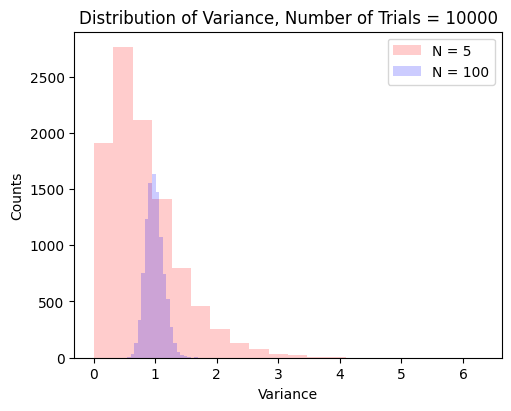

In [6]:
from scripts.testFuncs import test3

test3(numSamples=(5, 100), numTrials=10000)

#### Student's $t$-distribution

<center><img align="center" height=150px width=auto src="https://en.wikipedia.org/wiki/William_Sealy_Gosset#/media/File:William_Sealy_Gosset.jpg"></center>

- When the number of samples is small, the distribution of sample means is not a normal distribution. It is a Student’s $t$-distribution.

$$
\begin{aligned}

& P(x, \nu) = \frac{\Gamma (\frac{\nu+1}{2})}{\sqrt{\pi \nu} \cdot \Gamma (\frac{\nu}{2})} (1 + \frac{x^2}{\nu})^{-(\frac{\nu+1}{2})} \\

& \text{Mean: } \mu = 0 \\
& \text{Standard deviation: } \sigma \gt 1

\end{aligned}
$$

- Compared to the normal distribution, it has heavier tails and **the probability in the tails is controlled by the degree of freedom, $\nu$ (DF)**.

<center><img align="center" height=300px width=auto src="./assets/fig10.png"></center>

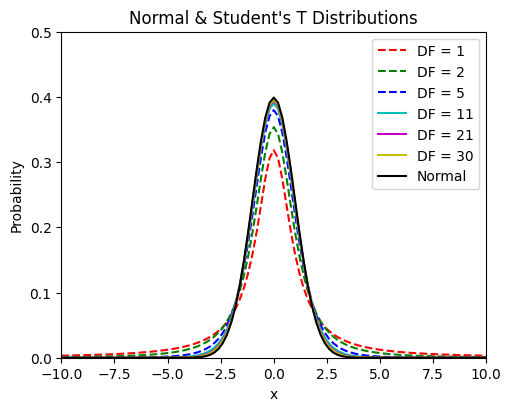

In [7]:
from scripts.testFuncs import test4

test4()

<a id="tag4"></a>

## **$t$-test**

- If the parameters of population are unknown, i.e., **the mean and standard deviation are unknown**, the estimate of the standard deviation of population, $s$, should be corrected as

$$
s = \sqrt{\frac{1}{N-1} \sum^{N}_{i=1}{(X_i - \bar{X})^2}}
$$

- Therefore, the test of hypothesis checking will be

$$
t = \frac{Y - \mathbb{E}[X]}{\text{Std}[Y]} = \frac{Y - \text{testing value}}{\frac{s}{\sqrt{N}}} 
$$

#### Comparison between $z$-test and $t$-test

<center><img align="center" height=300px width=auto src="./assets/fig11.png"></center>

- According to the result of $z$-test, we are going to accept the null hypothesis. However, we will reject the null hypothesis according to the result of $t$-test.



z-value = 1.606
Probability = 0.108
t-value = 2.219
Probability = 0.054


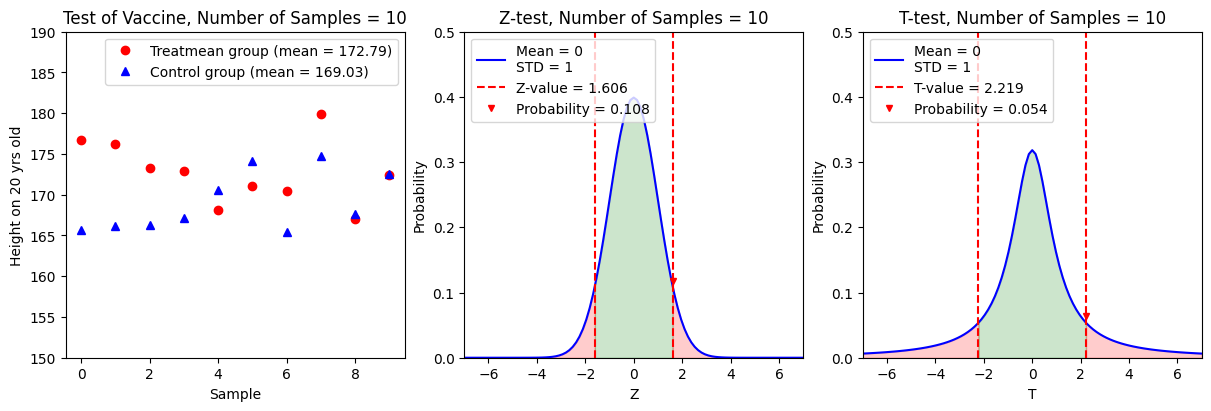

In [8]:
from scripts.testFuncs import test5

test5(numSamples=10)

#### Brief Summary of $t$-test

- The flowchart of hypothesis checking with small number of samples ($t$-test):

    1. Have data.
    
    2. State the null hypothesis $𝐻_0$ and alternative hypothesis $𝐻_𝑎$. Set a confidence threshold $\alpha$.
    
    3. Calculate the standard score ($t$-value) of the test statistic.
    
    4. Claim that we can reject the null hypothesis with confidence $\alpha$ if the standard score is in the rejection region and accept the alternative hypothesis with confidence $1 − \alpha$.
    

<br>

<center><h4><font color="#FFFF00">Hey! Where is the control group?</font></h4></center>

<a id="tag5"></a>

## **One-sample and Two-sample Tests**

- Thus far in this lecture, we have looked only at **one-sample tests**, i.e., only the treatment group is taken into consideration during the test.

$$
\begin{matrix}
H_0 : \mu = 170 \\
H_a : \mu \neq 170
\end{matrix}

\text{ or }

\begin{matrix}
H_0 : \mu \gt 170 \\
H_a : \mu \leq 170
\end{matrix}
$$

- In general (or in our data), there are treatment and control groups. What we are interesting is whether **the difference in means of these two groups** is statistically significant or not.

$$
\begin{matrix}
H_0 : \mu_{treat} = \mu_{control} \\
H_a : \mu_{treat} \neq \mu_{control}
\end{matrix}

\text{ or }

\begin{matrix}
H_0 : \mu_{treat} \gt \mu_{control} \\
H_a : \mu_{treat} \leq \mu_{control}
\end{matrix}
$$

<center><h4><font color="#FFFF00">This is known as the two-sample test.</font></h4></center>

#### Two-tailed and Two-sample $t$-tests

- Let’s assume that **the treatment and control groups are independent**. Usually we have several situations. Here we only discuss these 2:

    1. The sample sizes are equal ($𝑛_1 = 𝑛_2 = N$) and these two distributions have the same variance ($s_1 = s_2 = s$).

    $$
    \begin{aligned}
    t &= \frac{\mu_1 - \mu_2}{s_p \cdot \sqrt{\frac{2}{N}}} \\
    s_p &= \sqrt{\frac{s_1^2 + s_2^2}{2}} \\
    s_i &= \sqrt{\frac{1}{n_i-1} \sum^{n_i}_{j=1}{(X_j - \bar{X})^2}}
    \end{aligned}
    $$

    2. The sample sizes are unequal and these two distributions have the similar variance ($\frac{1}{2} \lt \frac{s_1}{s_2} \lt 2$).

    $$
    \begin{aligned}
    t &= \frac{\mu_1 - \mu_2}{s_p \cdot \sqrt{\frac{1}{n_1} + \frac{1}{n_2}}} \\
    s_p &= \sqrt{\frac{(n_1 -1) \cdot s_1^2 + (n_2 -1) \cdot s_2^2}{n_1 + n_2 -2}}
    \end{aligned}
    $$

<center><h4><font color="#FFFF00">Clearly, the trial of 吃人夠夠 vaccine is the second one.</font></h4></center>

<center><img align="center" height=300px width=auto src="./assets/fig12.png"></center>

- According to **the result of two-tailed two-sample $t$-test**, we are going to reject the null hypothesis and accept the alternative hypothesis with confidence $98.3 \%$.

t-value = 2.401
Probability = 0.017


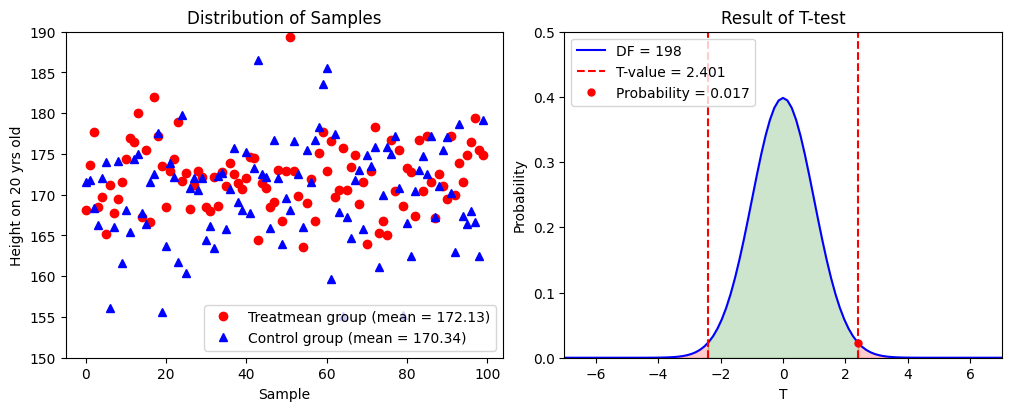

In [9]:
from scripts.testFuncs import test6

test6()

In [10]:
# Scipy results

from scripts.testFuncs import test7

test7()

1-sample T-statistic = 5.081270655581135
1-sample p-value = 1.770143341225191e-06
TtestResult(statistic=5.081270655581135, pvalue=1.770143341225191e-06, df=99)
2-sample T-statistic = 2.4014790438801255
2-sample p-value = 0.01737771481892233
TtestResult(statistic=2.4014790438801255, pvalue=0.01737771481892233, df=174.75813798695754)


## **Summary**

- The flowchart of hypothesis checking:

    1. Have data.

    2. Do you know the parameters of population? Go $t$-test if unknown.
    
    3. State the null hypothesis $𝐻_0$ and alternative hypothesis $𝐻_𝑎$ (one-tailed or two-tailed? one-sample or two-sample?). Set a confidence threshold $\alpha$.
    
    3. Calculate the standard score ($z$-value or $t$-value) of the test statistic.
    
    4. Claim that we can reject the null hypothesis with confidence $\alpha$ if the standard score is in the rejection region and accept the alternative hypothesis with confidence $1 − \alpha$.
    

<br>

<center><h4><font color="#FFFF00">This is an introductory course.<br>
Please take the courses of Statistics for more details.</font></h4></center>